In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
D1 = [
    # Sample: [probability, label]
    [0.02, 1],
    [0.13, 1],
    [0.16, 1],
    [0.24, 1],
    [0.33, 0],
    [0.47, 0],
    [0.58, 1],
    [0.69, 1],
    [0.97, 0],
    [0.99, 0],
]

D2 = [
    # Sample: [probability, label]
    [0.02, 1],
    [0.13, 0], # 샘플 한 개만 변경
    [0.16, 1],
    [0.24, 1],
    [0.33, 0],
    [0.47, 0],
    [0.58, 1],
    [0.69, 1],
    [0.97, 0],
    [0.99, 0],
]

In [3]:
def prepare_confumat(D):
    num_even = [val[1] for val in D].count(1) # Negative
    num_odd  = [val[1] for val in D].count(0) # Positive
    TPRs, FPRs = [], []
    for thresh in np.linspace(0, 1, len(D)+1):
        TP = [D[i][1] for i in range(len(D)) if D[i][0] > thresh].count(0)
        FP = [D[i][1] for i in range(len(D)) if D[i][0] > thresh].count(1)
        TN = num_even - FP
        FN = num_odd - TP
        TPRs.append(
            TP / (TP + FN) # TPR
        )
        FPRs.append(
            FP / (TN + FP) # FPR
        )
    return TPRs, FPRs

In [4]:
TPRs1, FPRs1 = prepare_confumat(D1)
TPRs2, FPRs2 = prepare_confumat(D2)

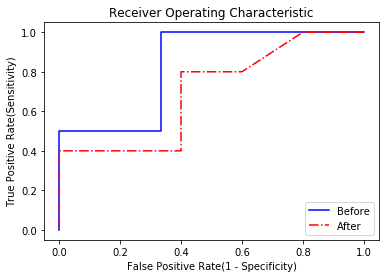

In [5]:
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(FPRs1, TPRs1, color='b', label='Before')
plt.plot(FPRs2, TPRs2, color='r', ls='-.', label='After')
plt.legend(loc='lower right')
plt.show()

In [6]:
def diff(li):
    res = []
    for i, j in zip(li[:-1], li[1:]):
        res.append(j - i)
    return res

def summing(li):
    res = []
    for i, j in zip(li[:-1], li[1:]):
        res.append(j + i)
    return res

In [7]:
def AUC(TPRs, FPRs):
    return np.sum(
        np.array(diff(FPRs[::-1])) * np.array(summing(TPRs[::-1]))
    ) / 2

In [8]:
AUC(TPRs1, FPRs1), AUC(TPRs2, FPRs2)

(0.8333333333333334, 0.7000000000000001)

# 연습문제 2.2

In [286]:
import torch

In [692]:
label = torch.randint(0, 2, (1000,))
modelA = (label + torch.randn((1000,)))
modelA = (modelA - modelA.min()) / (modelA.max() - modelA.min())
modelB = torch.randn((1000,)).uniform_(0, 1)

In [693]:
modelA, a_ind = modelA.sort()
modelB, b_ind = modelB.sort()

In [694]:
class D:
    def __init__(self, model, label, ind):
        self.true = label[ind]
        self.pred = model
    def __len__(self):
        return len(self.true)
        
Da = D(modelA, label, a_ind)
Db = D(modelB, label, b_ind)

In [695]:
def get_PRs(D):
    """ torch version """
    num0 = (D.true == 0).sum().item()
    num1 = (D.true == 1).sum().item()
    TPRs, FPRs = [], []
    for thresh in np.linspace(0, 1, len(D)+1):
        TP = (D.true[D.pred > thresh] == 0).sum().item()
        FP = (D.true[D.pred > thresh] == 1).sum().item()
        TN = num1 - FP
        FN = num0 - TP
        TPRs.append(
            TP / (TP + FN) # TPR
        )
        FPRs.append(
            FP / (TN + FP) # FPR
        )
    return TPRs, FPRs

In [696]:
def get_P_R(D):
    """ torch version """
    num0 = (D.true == 0).sum().item()
    num1 = (D.true == 1).sum().item()
    Ps, Rs = [], []
    for thresh in np.linspace(0, 1, len(D)+1):
        TP = (D.true[D.pred > thresh] == 0).sum().item()
        FP = (D.true[D.pred > thresh] == 1).sum().item()
        TN = num1 - FP
        FN = num0 - TP
        Ps.append(
            TP / (TP + FP + 1e-7) # Precision
        )
        Rs.append(
            TP / (TP + FN + 1e-7) # Recall
        )
    return Ps, Rs

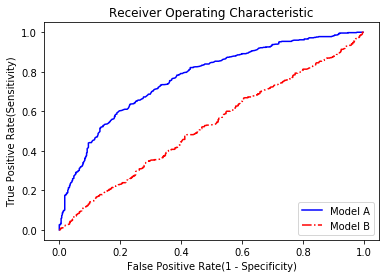

In [697]:
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(*get_PRs(Da), color='b', label='Model A')
plt.plot(*get_PRs(Db), color='r', ls='-.', label='Model B')
plt.legend(loc='lower right')
plt.show()